<a href="https://colab.research.google.com/github/Gigdoz/AI-Technologies_ControlPoint/blob/main/practice/ML_%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing
sns.set()

In [2]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.cluster import KMeans, MiniBatchKMeans

# Кластеризация данных

## Разведочный анализ и предобработка данных

Подробно о датасете

https://data-flair.training/blogs/r-data-science-project-customer-segmentation/

In [3]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [40]:
Mall_Customers = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Mall_Customers.csv')

In [5]:
Mall_Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
Mall_Customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
def obj_in_int(df):
  for column in df:
    if df[column].dtype == 'O':
      df.loc[:, 'Ind_' + column] = pd.factorize(df[column])[0]

In [41]:
dataset = Mall_Customers.copy()
obj_in_int(dataset)
dataset = dataset.drop(['Gender', 'CustomerID'], axis=1)
dataset.describe()

,Age,Annual Income (k$),Spending Score (1-100),Ind_Gender
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,0.560000
std,13.969007,26.264721,25.823522,0.497633
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000
50%,36.000000,61.500000,50.000000,1.000000
75%,49.000000,78.000000,73.000000,1.000000
max,70.000000,137.000000,99.000000,1.000000


## Распространенные алгоритмы кластеризации

### K-Means

In [130]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Ind_Gender']
X = dataset

#### Метрики

In [57]:
best_metric = [0, 10000]

silhouette_score_values = []
adjusted_rand_score_values = []

n_clusters = np.arange(2, 10)
for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    y_pred = clusterer.fit_predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    # Мы не знаем наши классы (Зачем тогда кластеризация, если и так знаем про кластеры)
    # score2 = metrics.adjusted_rand_score(y, y_pred)
    # adjusted_rand_score_values.append(score2)


    # if score1 < best_metric[1] and score2 > best_metric[2]:
    if score1 < best_metric[1]:
      best_metric[0] = n
      best_metric[1] = score1

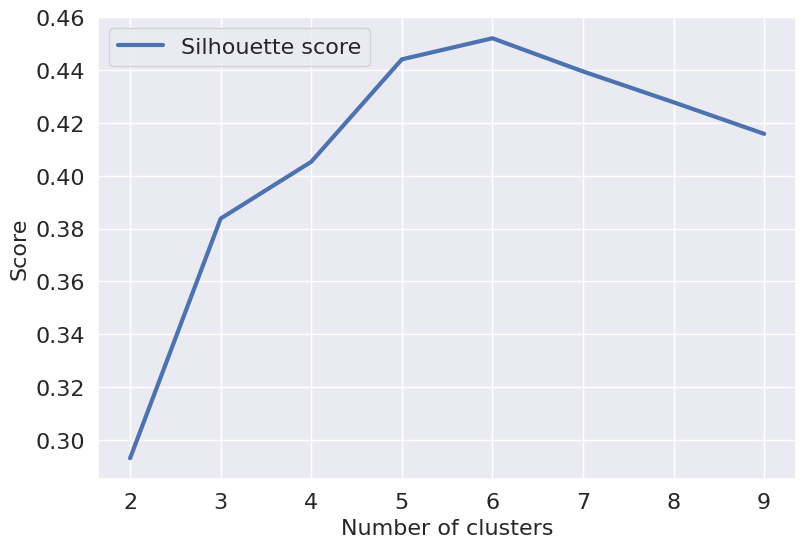

In [58]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
# plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()

#### Визуализация кластеров

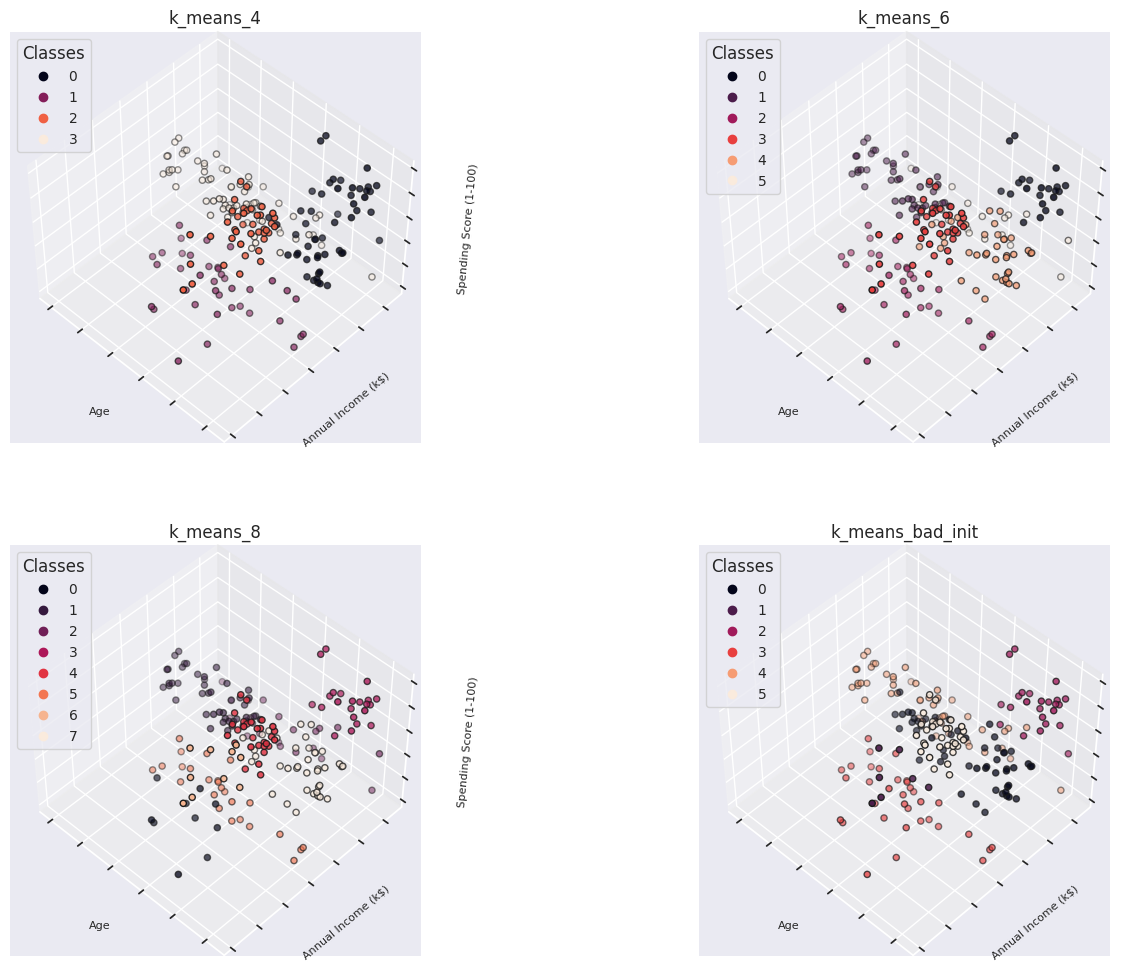

In [90]:
estimators = [
    ("k_means_4", KMeans(n_clusters=4)),
    ("k_means_6", KMeans(n_clusters=6)),
    ("k_means_8", KMeans(n_clusters=8)),
    ("k_means_bad_init", KMeans(n_clusters=6, n_init=1, init="random")),
]

fig = plt.figure(figsize=(16, 12))
for idx, (name, est) in enumerate(estimators):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    scatter = ax.scatter(X[columns[0]], X[columns[1]], X[columns[2]], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel(columns[0], fontsize=8)
    ax.set_ylabel(columns[1], fontsize=8)
    ax.set_zlabel(columns[2], fontsize=8)
    ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes", fontsize=10)
    ax.set_title(name)

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

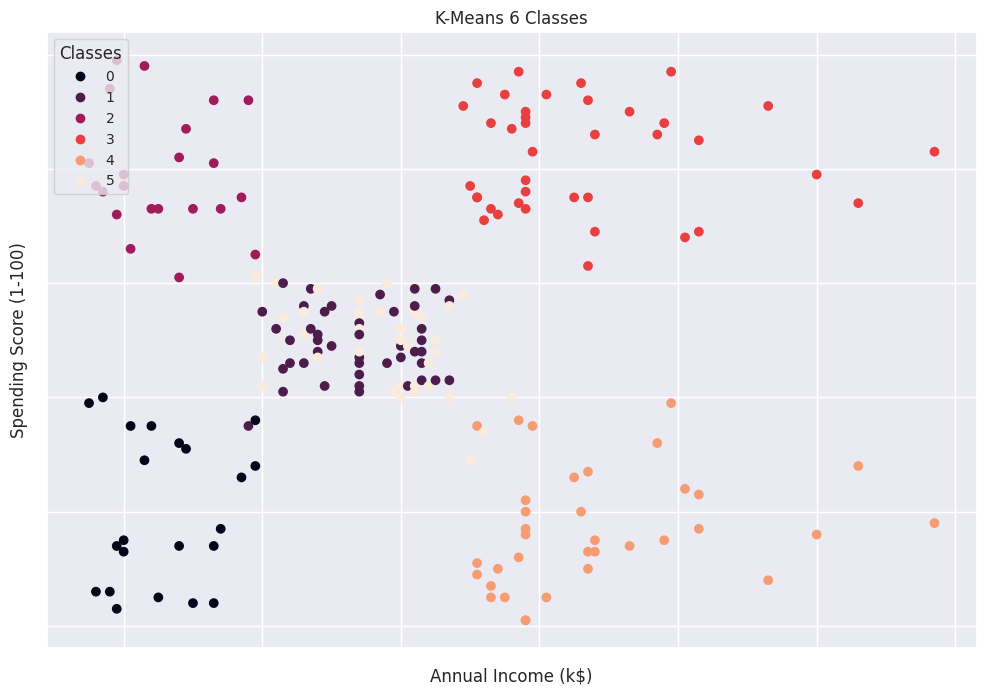

In [152]:
fig = plt.figure(figsize=(12, 8))

est = KMeans(n_clusters=6)
est.fit(X)
labels = est.labels_
ax = fig.add_subplot()
ax.scatter(X[columns[1]], X[columns[2]], c=0.5*labels)

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.set_xlabel(columns[1], fontsize=12)
ax.set_ylabel(columns[2], fontsize=12)
ax.legend(*scatter.legend_elements(),
          loc="upper left", title="Classes", fontsize=10)
ax.set_title("K-Means 6 Classes")
plt.show()

Из приведенной выше визуализации мы видим, что существует распределение 6 кластеров следующим образом:

Кластер 1 и 5 – Эти кластеры представляют собой customer_data со средним доходом, а также средними годовыми расходами на зарплату.

Кластер 3 – Этот кластер представляет собой customer_data с высоким годовым доходом, а также высокими годовыми расходами.

Кластер 0 – Этот кластер обозначает customer_data с низким годовым доходом, а также низкими годовыми расходами на доход.

Кластер 4 – Этот кластер обозначает высокий годовой доход и низкие годовые расходы.

Кластер 2 – Этот кластер представляет собой низкий годовой доход, но его высокие годовые расходы.

### Иерархическая кластеризация

In [31]:
from scipy.cluster.hierarchy import linkage, dendrogram

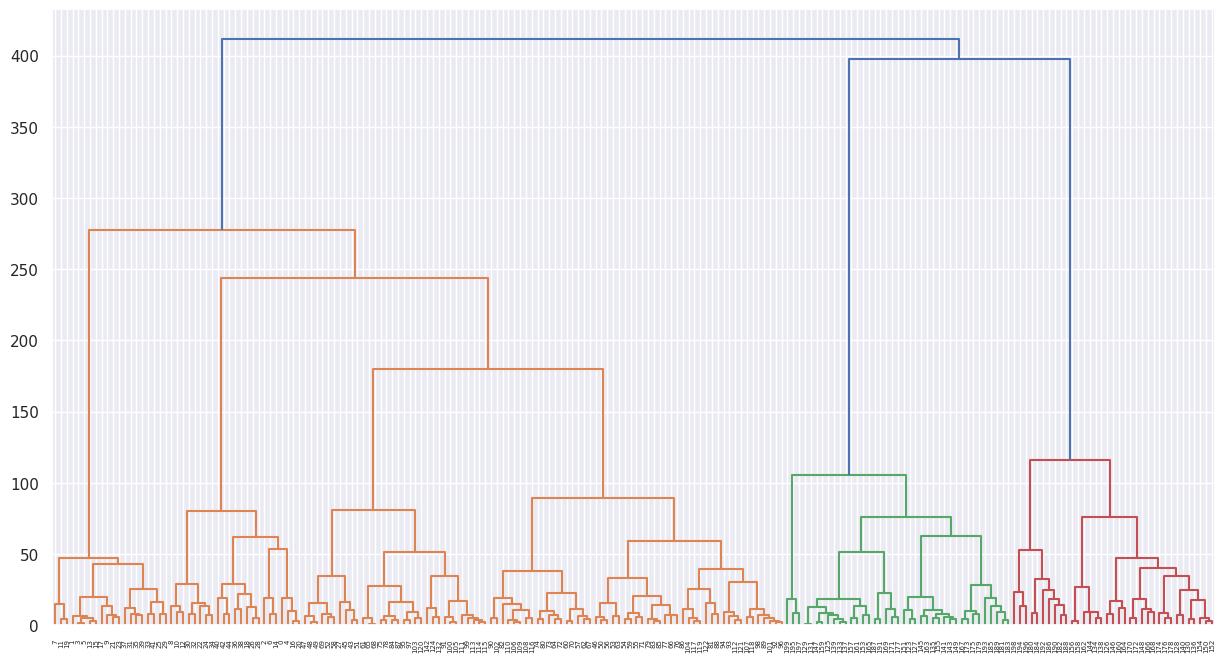

In [51]:
samples = dataset.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='ward')
# попробуйте с другими методами
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

plt.figure(figsize=(15, 8))
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,

           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

### Пространственная кластеризация приложений с шумом на основе плотности

In [59]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

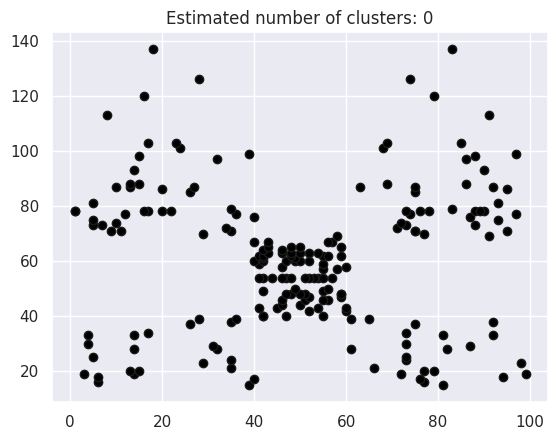

In [116]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

db = DBSCAN(eps=0.3, min_samples=20).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy['Spending Score (1-100)'], xy['Annual Income (k$)'], "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy['Spending Score (1-100)'], xy['Annual Income (k$)'],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

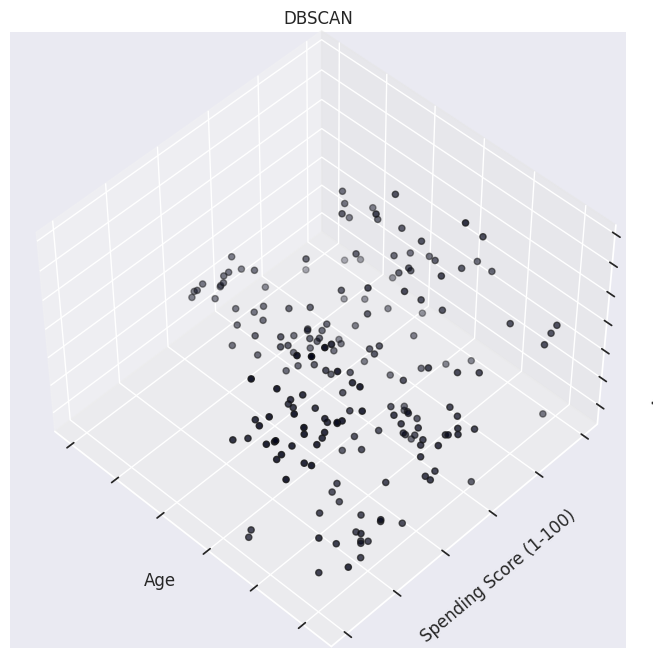

In [117]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)

ax.scatter(X["Age"], X['Spending Score (1-100)'], X['Annual Income (k$)'], c=labels.astype(float), edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Age")
ax.set_ylabel("Spending Score (1-100)")
ax.set_zlabel("Annual Income (k$)")
ax.set_title("DBSCAN")

plt.show()

In [119]:
# sc = metrics.silhouette_score(X, labels)
# print("Silhouette Coefficient:%0.2f" % sc)
# ari = adjusted_rand_score(y, labels)
# print("Adjusted Rand Index: %0.2f" % ari)